# Lab 3: Genome-Wide Association Studies

### Due March 25, 2020 11:59 PM

#### Preamble (Don't change this)

## Important Instructions - 

1. Please implement all the *graded functions* in main.py file. Do not change function names in main.py.
2. Please read the description of every graded function very carefully. The description clearly states what is the expectation of each graded function. 
3. After some graded functions, there is a cell which you can run and see if the expected output matches the output you are getting. 
4. The expected output provided is just a way for you to assess the correctness of your code. The code will be tested on several other cases as well.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
%run main.py

In [25]:
module = Lab3()

## GWAS from dogs genotype data

In this lab, you will perform GWAS on genotype data from dogs.
The binary phenotype considered will be "yellow fur color".
Hence, we will be trying to identify SNPs in a dog genome that are associated with yellow fur.

You will work with the file dog_genotype.vcf.
The first few lines of the file start with ``##`` and can be ignored, as they contain general information about the file.
The header line starts with ``#`` and contains the names of each of the columns in the matrix.
All the remaining lines correspond to the data about a specific SNP.

Notice that the columns are separated by tab ("\t").

In [4]:
initial_lines=[]
header_line=""
snp_lines=[]

for cur_line in open("dog_genotype.vcf","r"):
    if cur_line[:2] == "##":
        initial_lines.append(cur_line)
    elif cur_line[:1] == "#":
        header_line = cur_line
    else:
        snp_lines.append(cur_line)

In [5]:
print(header_line)

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	dark_13	dark_23	dark_21	yellow_5	yellow_6	dark_1	dark_7	dark_9	dark_2	dark_10	dark_8	yellow_24	yellow_22	dark_17	dark_18	dark_4	dark_6	dark_5	yellow_16	yellow_14	yellow_18	yellow_15	yellow_13	yellow_17	yellow_12	yellow_10	yellow_11	dark_11	dark_19	dark_20	dark_12	dark_3	dark_28	dark_25	dark_26	dark_29	dark_27	yellow_8	yellow_1	yellow_3	dark_14	dark_15	yellow_7	yellow_2	dark_22	yellow_4	yellow_9	yellow_31	dark_24	dark_31	yellow_23	yellow_20	yellow_21



As you can see above, the header line contains SNP information such as chromosome, position,  SNP id, REF, and ALT.

The columns dark_13 until yellow_21 represent 53 dogs. Their ids encode whether they have yellow or dark fur (coat).

In [6]:
for line in snp_lines[:3]:
    print(line)

1	5123496	chr1:5123496	T	C	.	.	PR	GT	0/0	0/1	0/0	0/0	0/0	1/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	1/1	0/0	0/0	0/0	0/0

1	9239488	chr1:9239488	G	A	.	.	PR	GT	0/0	./.	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	1/1	./.	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	0/0	0/1	0/0	1/1	1/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	0/0	0/0

1	10894485	rs22000016,BICF2S24323938	A	T	.	.	PR	GT	0/0	0/0	0/0	0/0	1/1	1/1	0/1	0/0	./.	0/0	0/0	0/0	0/0	0/1	0/1	0/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/1	0/0	1/1	0/0	0/1	0/0	0/1	0/1	1/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	1/1	./.	0/0	0/0	0/1	0/0	1/1	0/0	0/0	0/1	0/0



Notice that the genotypes are encoded as x/y, where x and y are in {0,1,.}. The '.' represents a genotype that is not known.

## Graded Function 1 : create_data() (10 marks)

Purpose - To prepare data for association analysis. We will prepare a dataframe which has 53 rows (one for each dog) and 3902 columns (one for each SNP).
The name of each column should encode the chromosome number and the position as 1:5123496 for chromosome 1 and position 5123496 (from the first and second columns).

You will begin by iterating through each of the snp_lines list created above. 
You will process all genotype columns (starting from the 10th column) and convert the "x/y" genotype to x+y (total number of ALT).

Genotypes containing a '.' should be converted into a ``np.nan``. These values will be ignored later.

Input - the snp_lines parsed at the beginning of the notebook

Output - You should return the 53 x 3902 dataframe

In [11]:
snp_data=module.create_data(snp_lines)

In [12]:
# you can visualize the first 5 rows of a pandas dataframe as follows:
snp_data.head()

,1:5123496,1:9239488,1:10894485,1:11798310,1:13061546,1:13469023,1:14254129,1:15732153,1:17432669,1:17794285,...,39:113786979,39:115191272,39:115607474,39:115954242,39:116294011,39:118625882,39:121038139,39:122458103,39:122478098,39:123278777
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,NaN,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


## Graded Function 2 : create_target() (10 marks)

Purpose - To parse the header line and create a list of phenotype labels for the 53 dogs. We will represent yellow fur by 1 and dark fur by 0.

You should parse the header line (tab-delimited) and from the 10th element, assign 1 if yellow appears in name and 0 if dark appears in name.

Input - the header_line parsed at the beginning of the notebook

Output - a list of values(either 0 or 1).

In [15]:
target=module.create_target(header_line)
print(target[:10])

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


## Expected Output - 

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

We will now add the target to the snp_data dataframe under the name "yellow"

In [16]:
snp_data["target"]=target

## Graded Function 3 : logistic_reg_per_snp(df)  (10 marks)

Purpose - To iterate through all SNPs and fit a logistic regression model for each SNP. 

We will use the Logit class of statsmodels.api to create the logistic regression models.
The advantage of statsmodels' version of Logistic Regression is that it returns a p-value (unlike the scikit-learn version).

The input for the model will be the dataframe column for a particular SNP and the target variable will be the target column with fur color information. 

<!-- You should not include values in the input column which are less than 0. -->

You should add a constant column to the input column. You can do that using sm.add_constant() function. 
This will guarantee that a constant $\beta_0$
Please see documentation for more information:

(https://www.statsmodels.org/stable/api.html)

(https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.html)

##### Note - Please use the method='bfgs' and disp=False in the fit method of the Logit object you will create.

##### Note - Please round off the p-value to 9 digits after decimal and betavalue to 5 places after decimal

The output should be list of 3902 pvalues and a list of 3902 beta values.

In [17]:
p_values,betavalues=module.logistic_reg_per_snp(snp_data)

Optimization terminated successfully.
         Current function value: 0.683264
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.675603
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.679092
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.676591
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.678240
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.648973
         Iterations: 12
         Function evaluations: 13
         Gr

         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.686919
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.552582
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.673382
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.592098
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.677403
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.562380
         Iterations: 11
  

         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.685407
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.683315
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.571723
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.671147
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.667729
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.662885
         Iterations: 10
         

         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.614632
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.685550
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.663455
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.683623
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.683637
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.616756
         Iterations: 10
      

         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.662314
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.686362
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.571165
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.679815
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.687208
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current fu

         Current function value: 0.635737
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.584970
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.586258
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.673091
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.682985
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.673490
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimizat

         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.677633
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.652645
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.676864
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.676864
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.667843
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.6

         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.658366
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.654282
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.638574
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.687697
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.626546
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Curre

         Current function value: 0.632386
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.650321
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.610812
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.582365
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.679405
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.689831
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimizat

         Current function value: 0.682535
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.683497
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.691167
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.649325
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.584191
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.622595
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimiza

         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.679279
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.671183
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.681586
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.624997
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.600424
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Curre

         Current function value: 0.680931
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.674660
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.690062
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.687913
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.437758
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.680979
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization

Optimization terminated successfully.
         Current function value: 0.676223
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.684882
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.625192
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.517701
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.551593
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.676009
         Iterations: 8
         Function evaluations: 9
       

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.584868
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.609638
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.689480
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.684939
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.625192
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.684928
         Iterations: 12
         

         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.686194
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.671729
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.645010
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.672131
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.540922
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.683

         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.687488
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.676774
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.688689
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.685167
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.627263
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.563439
         Iterations: 10
    

         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.603708
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.685044
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.587986
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.600779
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.687838
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.688730
         Iterations: 9
       

         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.680145
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.682777
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.663608
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.689844
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.590164
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.674023
         Iterations: 9
      

         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.682262
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.685167
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.660986
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.567576
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.553034
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Cu

         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.680418
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.679296
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.665161
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.677394
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.649725
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.680003
   

         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.684073
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.660986
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.672070
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.654721
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.595874
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.672920
         Iterations: 8
        

         Current function value: 0.670110
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.671147
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.684928
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.683398
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.635792
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.679296
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimizati

         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.688960
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.626917
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.590164
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.515763
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.487750
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         C

         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.684758
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.638574
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.553887
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.673498
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.640642
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Curre

         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.656081
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.685332
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.683264
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.664961
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.661422
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.6

         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.687689
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.685256
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.675188
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.613046
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.674289
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Cu

         Current function value: 0.624339
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.682024
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.688422
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.612332
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.683988
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.535537
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimiza

         Current function value: 0.689974
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.664958
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.685811
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.684286
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.689894
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.678436
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization termin

         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.647749
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.685041
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.609515
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.643990
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.681640
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Curren

In [18]:
print(p_values[:10])

print(betavalues[:10])

[0.471163991, 0.250546824, 0.341485853, 0.314182679, 0.255696421, 0.120055343, 0.965506994, 0.864100297, 0.864100297, 0.143809377]
[-0.51109, -0.77511, -0.40365, 0.39437, 0.52553, -1.60262, 0.01903, 0.12674, 0.12674, 0.96828]


## Expected Output - 

[0.471163991, 0.250546824, 0.341485853, 0.314182679, 0.255696421, 0.120055343, 0.965506994, 0.864100297, 0.864100297, 0.143809377]

[-0.51109, -0.77511, -0.40365, 0.39437, 0.52553, -1.60262, 0.01903, 0.12674, 0.12674, 0.96828]

In [19]:
# You may also want to look at some crosstabs between a SNP and the target phenotype
# For example, let's take the beta with the largest absolute

betamax = np.argmax(np.abs(betavalues))
pd.crosstab(snp_data[snp_data.columns[betamax]],snp_data['target'])

target,0,1
22:55322251,,
0.0,29,14
1.0,0,6
2.0,0,3


We see that for SNP 22:55322251, every single dog in our dataset that has one or two ALT variants, has yellow fur.

## Graded Function 4 : get_top_snps() (10 marks)

Purpose - To identify the 5 SNPs whose association with dog color has the highest stastical significance. 

Statistical significance is determined in terms of p-values computed above.
The lower the p-value, the more significant the association is.

Output - list of 5 tuples, each with chromosome and position

#### Example Output Format - [('1','10'),('2','20'),('3','30'),('4','40'),('5','50')]

In [26]:
module.get_top_snps(snp_data,p_values)

[('11', '71015937'),
 ('22', '9105438'),
 ('1', '38582241'),
 ('36', '27318582'),
 ('29', '7704450')]

## Manhattan plot

A Manhattan plot shows -log_10(p-value) for each of the SNPs, organized by chromosome.
The Manhattan plot is commonly used to display the result of a GWAS: https://en.wikipedia.org/wiki/Manhattan_plot

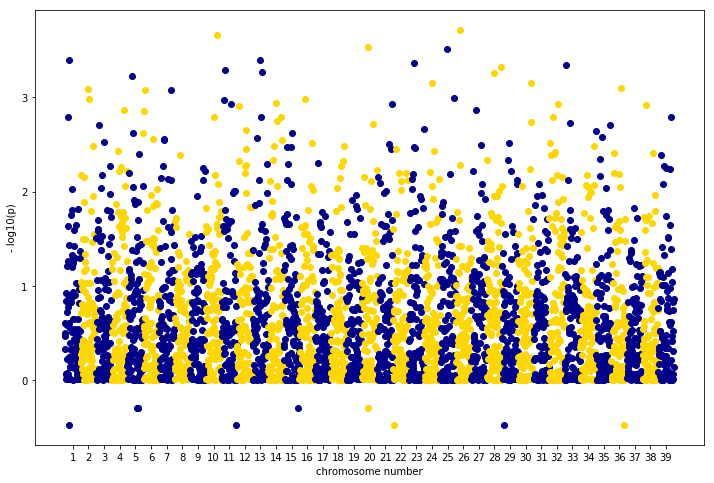

In [27]:
cur_chr = '1'
cur_x = []
cur_y = []
prev_start = 0
xpos = []
xlabel = []

fig, ax = plt.subplots(figsize=(12,8))

for i in range(len(p_values)):
    
    chrm = (list(snp_data.columns)[i]).split(':')[0]
    
    if chrm != cur_chr:
        clr = 'gold' if int(cur_chr)%2 == 0 else 'darkblue'
        ax.plot(cur_x,cur_y, marker='o',linestyle='',color=clr)
        xpos.append(int((prev_start+i)/2))
        xlabel.append(cur_chr)
        cur_chr = chrm
        cur_x = []
        cur_y = []
        prev_start = i

    cur_x.append(i)
    cur_y.append(-np.log10(p_values[i]))

clr = 'gold' if int(cur_chr)%2 == 0 else 'darkblue'
ax.plot(cur_x,cur_y, marker='o',linestyle='',color=clr)
xpos.append(int((prev_start+i)/2))
xlabel.append(cur_chr)
plt.xticks(xpos, xlabel)
plt.xlabel('chromosome number')
plt.ylabel('- log10(p)')
plt.show()    

Notice that there are multiple SNPs in chromosome 5 and they are close to each other.
In fact, these SNPs are on the MC1R gene (https://www.ncbi.nlm.nih.gov/gene/489652), which plays a role in skin/fur pigmentation.